# Contact of bouncing ball

Reference: https://underactuated.mit.edu/multibody.html#spinning_ball_bouncing

In [13]:
using Pkg
Pkg.activate(".")
Pkg.instantiate()

  Activating project at `~/syndr/Wouter/Onderzoek/Projecten/tue/compasswalker/actinf-compasswalker`


In [95]:
using Base64
using LinearAlgebra
using Distributions
using CairoMakie
using GeometryBasics

In [15]:
# Frames per second
fps = 30;

In [16]:
function display_mp4(filename)
    display("text/html", string("""<video autoplay controls><source src="data:video/x-m4v;base64,""",
    base64encode(open(read,filename)),"""" type="video/mp4"></video>"""))
end

display_mp4 (generic function with 1 method)

#### Coordinate system

In [17]:
θr = range(0, stop=2π, length=100)

f = Figure(resolution = (800, 500))
ax = Axis(f[1, 1], aspect = 1)
xlims!(-1.1,1.1)
ylims!(-1.1,1.1)

# States
θk = Observable(0.0)

# Stance leg
xr = @lift([cos(-$θk + π/2)])
yr = @lift([sin(-$θk + π/2)])
scatter!(xr, yr, linewidth=5, color=:black)

# Write animation
record(f, "animations/trig.mp4", θr; framerate = fps) do θ
    θk[] = θ
end

display_mp4("animations/trig.mp4")

<source src="data:video/x-m4v;base64,AAAAIGZ0eXBpc29tAAACAGlzb21pc28yYXZjMW1wNDEAAAAIZnJlZQAAM7dtZGF0AAACoQYF//+d3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE2MyAtIEguMjY0L01QRUctNCBBVkMgY29kZWMgLSBDb3B5bGVmdCAyMDAzLTIwMjEgLSBodHRwOi8vd3d3LnZpZGVvbGFuLm9yZy94MjY0Lmh0bWwgLSBvcHRpb25zOiBjYWJhYz0xIHJlZj01IGRlYmxvY2s9MTowOjAgYW5hbHlzZT0weDM6MHgxMTMgbWU9aGV4IHN1Ym1lPTggcHN5PTEgcHN5X3JkPTEuMDA6MC4wMCBtaXhlZF9yZWY9MSBtZV9yYW5nZT0xNiBjaHJvbWFfbWU9MSB0cmVsbGlzPTIgOHg4ZGN0PTEgY3FtPTAgZGVhZHpvbmU9MjEsMTEgZmFzdF9wc2tpcD0xIGNocm9tYV9xcF9vZmZzZXQ9LTIgdGhyZWFkcz0xNiBsb29rYWhlYWRfdGhyZWFkcz0yIHNsaWNlZF90aHJlYWRzPTAgbnI9MCBkZWNpbWF0ZT0xIGludGVybGFjZWQ9MCBibHVyYXlfY29tcGF0PTAgY29uc3RyYWluZWRfaW50cmE9MCBiZnJhbWVzPTMgYl9weXJhbWlkPTIgYl9hZGFwdD0xIGJfYmlhcz0wIGRpcmVjdD0zIHdlaWdodGI9MSBvcGVuX2dvcD0wIHdlaWdodHA9MiBrZXlpbnQ9MjUwIGtleWludF9taW49MjUgc2NlbmVjdXQ9NDAgaW50cmFfcmVmcmVzaD0wIHJjX2xvb2thaGVhZD01MCByYz1jcmYgbWJ0cmVlPTEgY3JmPTIwLjAgcWNvbXA9MC42MCBxcG1pbj0wIHFwbWF4PTY5IHFwc3RlcD00IGlwX3JhdGlvPTEuNDAgYXE9MToxLjAwAIAAAA0+ZYiEADf//veBvzLLXyK6yXH5530srM885DxyXs1+HgxQ4gY4IPj10/4jHrGCmU3mpqKGyVfSZsfjJAAAAwAABuAVQ9ijnCp8lLLh1/jbaOKo5QFZKJQaRzHtvxu4Gg6XbAwYcLXFXmbxM6R+//IFehYWwu9lIYKsB52gMiXCEf/dLVn9J2JRPRMQ76zh29W/SjXpy1ceVnC45epub3bn+RIql8uq8IUQvVAvC9vtTnpftuNEXMyxNKs00PwgB3Bd3nWD9xMiocc1jxRRsu5r3UzsvtRp/aRnTawAbuVDrmvjIcVcNf6MN5q9A5nmDDsYb/yt4vvix3pGhIMstP/qWwq/EC4v+UXLIUwG+rk/ZuRm78aI+yNX2NS0gsP5weBj0LIZIsScfxp7dMRDv/q7DDaJALStDDZc0s3e+68qUhm7IpK2noJBfDkTcwtlK6ZyNi9ej7sBMbKanr8NqDJ8aN3vAyvx58GddibcRDIejZI0HKvjC1uKpCEALhQdXqfn9/fATFtH+rXFBb4xOBh633f+/U6hrIrcjB5v3UoqcN9a/5Kt1SYFLwev5fmHPHMArJnahHVme+vAGzdnH5Dii2j8qylqaB5+FtKCHB0mHn2E+DWW0CTEabpQJUbj896zfNExezvX63SPdf8fWl1VWaJD0Amv2YT7lhTRaNBQN9EnqTxooXntoj5lBXgyvLneX/w3RAkcGqLE2dcNQkD/ZXR5YUUnYNsMEiiPecTFk1rTmQL/9YL0j1xnz9CXl2wzagbkkU47Vmovp28vuwAawwIAc86HsvRC+W+FeDq6Z2uOVeBgkQGgB+iRzA6ATxm0AAADAAADACHtkde7CydUP0JonxcAterNO7eKueKOu1M0tVMq2OjcOUof5d2bYzGCxp1n39Ed5h+A/x05rkRgfdAhGVleOiuIwvfEA2juGThxqJ3PPhqa5ajuE8ColQ4Uvkmps2FSERsbuDecRM2eoc9gTdmaG3DN/rNHm6JsI/s2z7604ufF04PTY7X1gk+LvhRMc6RltDtnRZyjXqwFD2OMR7XhnAjAA1dRmCGINE707PnaZeVFo8uNwPvnRtf0jTkzznl7HMsvpV+O9xoKCokpNjjKf2hSfFtATkry7fZm0oubh6m/2OkHab/5KkqPFUKeIgvSGlkeUYZXXNH++7Ch8QqHBCf+HoNWEt9nyaaLPTsGIKJN7L1pNJmc733DKNunaAcLDBWW0E07DEgk2//MEvzWJM/kj0V6j7XiyDGtjIrnvjSH6gz7oHxKpls2bATeOQbyRUn5wRaI5H2CDnpLdwHU+8CBBBudTgaBYRIBPEOvctmGAAb8YAAAAwAAAwAAAwAAAwAAcgzxNmv/3QUSUM3VK50wfbdk0kf9mOkg4OooViVsyxASBl0N0qIRBaz/kb3KJZwRt1f7Bd8qRDHLJ4H/ZnfNjRuaX161S9lCaiZdEGPSwGqDEyY1/XVTsJiJfxJ0+xDw9b2XNi47i7YKyokIlapOZNGwEy9UQTbeRgrJq5/ztf5Gs6p4I/+DSxHVqfIwA+EI2CFiNW7a4+EegJOu/Fqq6mz4NVz6ABUwCoKO8RRWMHHP65USbg2+SE0qJovioiFXKJk7PW5rfH2TEe5k+ZNOIPJvNci53iZpxdWS+2bEGHA/C3vfg2fznqhK9zE+u3kuIidFiGr3ry4o8bU8mUD1D7zR/feT5AAFcAv4KQDZest+OncIvlhpCIcd3+RHD9IigoLQ8FNwSiLGO3801K5iKrWrG9EhIN6nEP2Xb0A1kRUcZyofc9om6R100r0okctlFZdhhSMe2EfAVW/2/qRsT2VBIoAQmv4WHJzF62AAAAMAAAMAAAMAAAMAAHnnHXo0cC3CGFCxwB7OnNDy7jGHPn+MyJYQ0taPZj+GmvemYJtYhvlujquaCpfZ4PV138IMY9bP5A8NImljcDf2EHMUKTOM9xF7UYKLlXge/hZMgGaUiZ3PnmXvYAAEA9+O+ewRt1/Yxx7t9Fv7pqWxvxKXQsYiEruWztUPZTrZljTgv2eLvzvlFJ1a8kD2/hkG+q53r8P14YH7zVaRE4wesDaFf3e9TGawKyzHO2kvNqDlO5CZBO9DOjDuAv5wFChh++QkPNhhqmyDevtcrTiVFxA9l2ackgDfNc4cHPFtFr5knhepdJ4C/G7tEvq1jFUZ07n4CBzZjZ8VvKdGZ//NsFSqVnV/boVAswiYvZVH8ELrexxIqili5KUf9X+4dHrhvmFaha5RVlxuAlqhD/bHP0i2rmv3WgOvYm1g3f7rLkb1Wc612euOjyst3ixwfBu+JFiyFoBEupdTzwALQAAAAwAAAwAAAwAAAwH5mQyobHvP1C8BqrjiQP+LPcy/A1kSB09m+4AA5o1MLPpResZgXvBjaXRsQJAgvxWwU5P2Oj7c6EM+j0hxuSJQN2gBj6LsFeOaRMPjfhq7Fmhdw412HeUn7vop4nkQbKxOFEt6ct5nyutiu4JNog0xl2g0d4W9BpQ0JZy7bWwJlmsiJneJyeD8Ke3znjilrG+DRih0miRm98TdIqpwFBpf9L9SJomFNPO7VUsyfzKprut95U7s+z3RaeTNiESMFTIyJF/1okfcLPt3EV9X7v+zf+Ma120Ezh2VLB6zWQt5xxeNhvIP9rdTXkbeNwe1RQ88ftMbL5XCEUNEkPpjr/lF+tjCVCO65W7ELj8m3xrvZfZ6G8QK6sd4/W6R6CxQU4PnsV0+AAC0aJb5ONewhtoH3LHZWaGR2oGlX3tqgp4svO7v69GRKW5NxzywFuM3EHfbH/rCTK27EWuXeSEkpbAna0pLuKeZHVKkQDlpEAuYvZk54aVIdaM6AeaTA4RXvRKQvdm1KBeK2FoA5whxwqhGEKMHTLpE6sHJ47FaHSPAYEdgUqZJvRrEmPaH0q1ldIW+mvQH+bDL0sRa3vcIDIkUqrXtAQdbcxJAFAmz+ISAHflnZTUW61cdwaC6P6hLLNhIPJo

## System

Imagine a hollow sphere in the plane with mass $m$, radius $r$. The configuration is given by $q = [x,\ z,\, \theta]^{\top}$. The equations of motion are:

$$ M(q) \ddot{q} = \tau_g + J^{\top}\lambda$$

where $M = \begin{bmatrix} m & 0 & 0 \\ 0 & m & 0 \\ 0 & 0 & \frac{2}{3}m r^2 \end{bmatrix}$, $\tau_g = \begin{bmatrix} 0 \\ - g \\ 0 \end{bmatrix}$, $J = \begin{bmatrix} 0 & 1 \\ 1 & 0 \\ 0 & r \end{bmatrix}$ and $\lambda = \begin{bmatrix} \lambda_x \\ \lambda_z \end{bmatrix}$.

The post-impact velocities are:

$$\dot{q}^{+} = \begin{bmatrix} \frac{3}{5} & 0 & -\frac{2}{5}r \\ 0 & -e & 0 \\ -\frac{3}{5r} & 0 & \frac{2}{5} \end{bmatrix} \dot{q}^{-}$$

where $e$ is a coefficient of restitution.

In [205]:
# Dynamical parameters
mass = 2.0
radius = 0.1
const gravity = 9.81
coeff_rest = 0.95

0.95

In [206]:
function dzdt(q,λ)
    
    # Unpack state
    x,z,θ,dx,dz,dθ = q
    
    # Mass matrix
    M = [mass 0     0;
         0    mass  0;
         0    0    2/3*mass*radius^2]
    
    # Gravity terms
    τ_g = [0; -gravity; 0]
    
    # Control matrix
    J = [0 1      0; 
         1 0 radius]
    
    return [dx; dz; dθ; inv(M)*(τ_g + J'*λ)]
end

dzdt (generic function with 1 method)

In [207]:
function check_collision(q)
    "Check distance to halfplane"
    
    # Normal vector to ground
    n = [0, 1]
    
    # Distance of surface to origin
    d = 0.0
    
    # Check side of halfplane
    return (dot(n,[q[1], q[2]-radius]) + d) <= 0.0
end

check_collision (generic function with 2 methods)

In [208]:
function collision(q)
    "Reduce velocity from impact"
    return [3/5. 0 -2/5*radius; 0 -coeff_rest 0; -3/5*radius 0 2/5]*q[4:6]
end

collision (generic function with 1 method)

In [231]:
Δt = 0.01
time = range(0, stop=10.0, step=Δt)
T = length(time)

1001

In [232]:
# Preallocate
z_ = zeros(6,T)

# Initial condition
z_0 = [0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
z_kmin1 = z_0

# Impact vectors
λ = zeros(2)

for (n,t) in enumerate(time)
    
    # Forward simulation
    z_[:,n] = z_kmin1 + Δt*dzdt(z_kmin1, λ)
    z_kmin1 = z_[:,n]
    
    # 
    if check_collision(z_kmin1)
        λ = [0, 1.]
        z_kmin1[4:6] = collision(z_kmin1)
    end
end

In [233]:
function show_state(x, z, θ)
    
    f = Figure(resolution=(800,700))
    ax = Axis(f[1, 1])

    # Slope
    poly!(ax, Point2f[(-1, -.1), (1, -.1), (1, 0), (-1,0)])
    CairoMakie.ylims!(ax, [0.,1.])
    
    pp = decompose(Point2f, Circle(Point2f(0), 10radius))
    scatter!(x, z, marker=GeometryBasics.Polygon(pp))
    
    # Set axis properties
    ylims!(-.2, 3.0)
    xlims!(-1, 1)
    
    return f
end

show_state (generic function with 2 methods)

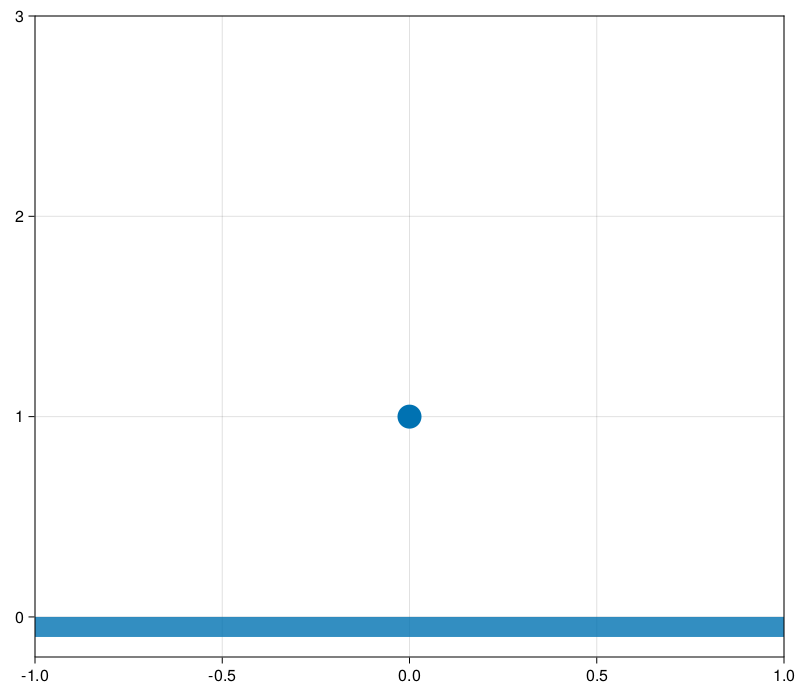

In [234]:
show_state(z_[1,1], z_[2,1], z_[3,1])

In [235]:
function animate_dynamics(qt::Vector{Vector{Float64}})

    f = Figure(resolution=(800,700))
    ax = Axis(f[1, 1])

    # States
    xk = Observable(0.0)
    zk = Observable(0.0)
    θk = Observable(0.0)

    # Surface
    poly!(ax, Point2f[(-1, -.1), (1, -.1), (1, 0), (-1,0)])
    CairoMakie.ylims!(ax, [0.,1.])
    
    # Sphere
    pp = decompose(Point2f, Circle(Point2f(0), 10radius))
    scatter!(xk, zk, marker=GeometryBasics.Polygon(pp))
    
    # Set axis properties
    ylims!(-.2, 3.)
    xlims!(-1., 1.)

    # Write animation
    record(f, "animations/bouncing_ball.mp4", qt; framerate = fps) do q
        xk[] = q[1]
        zk[] = q[2]
        θk[] = q[3]
    end
end

animate_dynamics (generic function with 1 method)

In [236]:
animate_dynamics([z_[:,k] for k in 1:T])

"animations/bouncing_ball.mp4"

In [237]:
display_mp4("animations/bouncing_ball.mp4")

<source src="data:video/x-m4v;base64,AAAAIGZ0eXBpc29tAAACAGlzb21pc28yYXZjMW1wNDEAAAAIZnJlZQABThptZGF0AAACoQYF//+d3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE2MyAtIEguMjY0L01QRUctNCBBVkMgY29kZWMgLSBDb3B5bGVmdCAyMDAzLTIwMjEgLSBodHRwOi8vd3d3LnZpZGVvbGFuLm9yZy94MjY0Lmh0bWwgLSBvcHRpb25zOiBjYWJhYz0xIHJlZj01IGRlYmxvY2s9MTowOjAgYW5hbHlzZT0weDM6MHgxMTMgbWU9aGV4IHN1Ym1lPTggcHN5PTEgcHN5X3JkPTEuMDA6MC4wMCBtaXhlZF9yZWY9MSBtZV9yYW5nZT0xNiBjaHJvbWFfbWU9MSB0cmVsbGlzPTIgOHg4ZGN0PTEgY3FtPTAgZGVhZHpvbmU9MjEsMTEgZmFzdF9wc2tpcD0xIGNocm9tYV9xcF9vZmZzZXQ9LTIgdGhyZWFkcz0xOCBsb29rYWhlYWRfdGhyZWFkcz0zIHNsaWNlZF90aHJlYWRzPTAgbnI9MCBkZWNpbWF0ZT0xIGludGVybGFjZWQ9MCBibHVyYXlfY29tcGF0PTAgY29uc3RyYWluZWRfaW50cmE9MCBiZnJhbWVzPTMgYl9weXJhbWlkPTIgYl9hZGFwdD0xIGJfYmlhcz0wIGRpcmVjdD0zIHdlaWdodGI9MSBvcGVuX2dvcD0wIHdlaWdodHA9MiBrZXlpbnQ9MjUwIGtleWludF9taW49MjUgc2NlbmVjdXQ9NDAgaW50cmFfcmVmcmVzaD0wIHJjX2xvb2thaGVhZD01MCByYz1jcmYgbWJ0cmVlPTEgY3JmPTIwLjAgcWNvbXA9MC42MCBxcG1pbj0wIHFwbWF4PTY5IHFwc3RlcD00IGlwX3JhdGlvPTEuNDAgYXE9MToxLjAwAIAAAAtCZYiEACf/0nge7cSnKN1VHqGKvW0wvg/+tddpwlA5SB10U3ZG9Z+g28XxzA6GmtxoEhbTRCLYTIDHs9Pw1op0SHxvJOSaZLi16KYQN+c/1Cedkb9fK5D+vq4d/CrwwlgVEJuOmpRcC7ZRZoqpPRKjV/zASkAAAAMAAAMAAAMBISwJqQC2KwZqm89hyx98qp5HAn5K4+aBZogNdjg1NE3zp2az4kF/CO+7jRtoBhcgbKuYI1WZC4UyhJKKDcELxc5aa4pmhtD1TLIWU4FlRTAAixTzEE6CHwCXRzSfdjx1I0z+gMTURcNcn20GSai9g1/v5LBv4O/zd/SxrT/dQF8MaozDU9XkMvsKvzu0w2zrae9mj7TuTBQnh8b89JCjAxSTuO9YdAHvc/yDXGbKZfGhltSRiyuxz5fZFgZ6NCpePREUx+S9XK/dDaDFvj4YF3GIBOHFtjUZdTXQDKp0pWgwAyuOcgCCoo6KCwYgwqUwpgegj5zOQ8jibznfv/iF6Te6nOPPcL36dU14ahZh8G3YYGuLS+AzqR0iaqEGnFN12hchD213EKOX33AV3dN1FWPAMu6X5rTO8ZdqQS8Dg6iOUUksMW/LOx+cFMlVDaTch/gYLj0zd2tqlLSCMDKsqTrs6Z5G4vDHgekDGAmd/YnwW0+a/go98Db1u29bjICovzpHIcGS7xfVKHrn5Av5UmZpzKowF+Xu9ctIr2ILZBvco6Ce35w0BZyv+rKXnL2zA62mJXm6UBvQ5LevoEMm434xC+/7gP9k2BGhjOgqppIwI+ptxz7zIBFafQjM7qU2zx0ZYO/dGrsBSV+no2CZzbE6WvDfwIjFGxQPffvl4pHJ+kAZpD9cOGG6OAps1feaZQnV0snotlVmxWD5LT+Zgh7zuaOhiPvsnEiwHYTLGEqxWW4FNw+i+eT5xCNj0oAxiRDDgxYA93SkiXG/DJW2yeElU0aYd9JR3DlY84vOFwfnpH7wa6zqRQpjvmTuA73CI9CvBahySzF2mWTX7FNn0SC/cpTl99E/S6KwKgJmm7s1BLSoiXIe6rpaUhoqFCAlMBZbmGeeZcgGVL9AAPUjY8tBXsreHD43CXJoq3QNF/RlSvvsSV0p4j72uU9Zeu+pTSBWeng2KVNzvesTilngRJUMIMEKcixJLy2X/AJm7FXQeb0hw6SkkAT1fqc/qzUslFUu/boT+sPg/DkOp5szPevfXpsCf0QNEOK0C2149Xk3tke8jG5YWjmnbCoJqf8y/ODFRLhEZKFkerjfCwEhJ9ZcT3t2Rm/e1FFMgxxMYU6kjwzff9ePcdoM7cVsFdwCN3/S46ugZUYk5lA6ny/DPK+KELiR/k87oLvc0KQfBlsDSby7uyoF5K2QJIaMwGZRm+Bq2wbH/g5TN21cFtHhO4u5UUHFXxtyFzpzMlp4C4uPzekFphEMEHNe1Ou+eL0erQOUv3axKDghF75l36+wUa26IgFVAAQbS+tCFUDZyGhiC+Up4XcdnOI0t4oirdulu3ugMfjK6dGRaaNEe5VHt+zf1HDLeZRJKsJqgU6FDC0gLMM1cOsOxsoCBzyeLG4EwJz5oAAAAwAAAwAAAwAAAwAAAwAAAwAAgDBHmu0lMg//iFZtl9rFms7ruKeFXmYLWfsyjdwYq5GaG08cvYwA142L1HgDNXwJJJC30+hYsOcidY4mn7ApwRwVH4LTG0Lk2fBQiZrzX488ctaPayj0pw6b+dryMJBuJIqIF3bZZNIWlfpf6BpFKB5gp7zuTNu5+n6+Cbb2MiXYM8kSo0naqMa+0qxcXSeLQyVmzUuhEFmOu5PGhCyvArYzF4k27y2sNl597cRiiShoOIBbqGxj4P4fYBsPWAithi6vnOx2HHOlt8tUtMSRfcHdwcWA78o7oDgRCqxkswT2+zXPNO5pzPR8cefcOC+aj5vBrXXUUWuAGgRC0q3UWPhQ9ZqTKA+Hvouv1BO3XGOJDSQMnyJK0DoGNxieKxu9Kn1IJcYn96BNk/acSUekQSTcGacYbnGs89gUFxBgAtLGJM/nfkxXy+Ml8lECEsH5evMw5acSx/HDWg2vxD/rFYgAk/T1lBGEV1wEwvB8v3etsNE4+Y58Cqa40LlbevqUX7sOB/Cr3cbPrp347475ol/tJZl1omPjxcTG0mnllKkgna186JbtGWuUzGW4szx/X/DAhpLOOxOybN3HOO1Ob0bCW8iNABXCNBg7/85tRvy+pY+uEQj6jH0L/tIdGtm/qblgnpbwt9pb5eONf0LtE3n+CPrO1ByqAfDpisoK4k9dNf161Xk9t+K22d23KhQOTYgCLAK+2AYSdxzpHdgnGXerngRJ71Mg0PxHiYaU+DbacNeJkCf/rlMYeP36d7jflXip6B5WDwqM7onJU3gZfFPshvih2Fvp0c/pxXA0aDZohXMdJB852Ctyi1u2BphgsULFDH6b1e43lrBuX1WmcRr3WLAIId6V/Hq8hzdYZgepktoSr6LLRi6RO3xnExY5GIHfMAyO5Ie6owFtsgtnR5CCVU12p6WFU6n2YIlhv0v5qSoA06wKgEVTPyf/XMzeYwSwoR518lK4sHxOp8Cl/sZKXqxEJBStMzOP8tM7smEn6v9HrosvoHDxbudSkpkBVAZS+0HA+qhspvqZGYT/w5lVTQ52Vm/K3qbz/bBpyZmw1Y/Mqwh/ccO/HC2Dact9pxDzjv5kS7BBSG/oW5kVVcQkDTithd0NrzMjMi9IpDZe7sBVFuPCq7c9d5i1236/YiiuSaOmlZ9unK8Xt/zur+FV0ZtvQDWK21QMYs+zXZwy4p25IxjUb1WvkctIGHlyGMzCqXUU6Q07bUKGllAT9hS9/kLfpGtyclz+cQGCutgHn4NyNB/a6LRaGePsa3kamzgQgec2bVtO3ZbFR8gKqkaA/SEEyX02LU4qZQq5MyqxpQW/GveWddQYS+i8Dj7s8wnEt4J6NiRK+67RwTPBk2TX3UytRy021Jxnp+X